1. Data Exploration and Preprocessing:


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Mean Squared Error (MSE) on testing set with unscaled predictions: 47306762

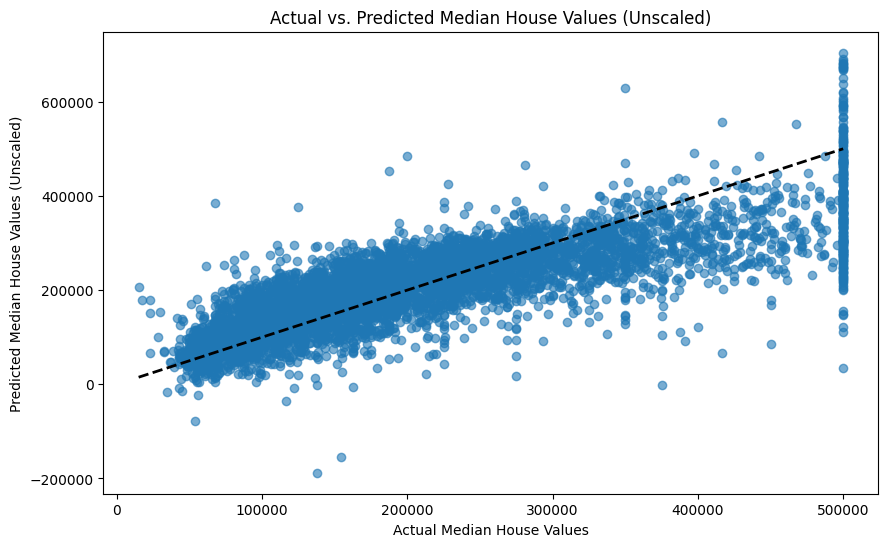

In [26]:
# **************** Importing Necessary Libraries ****************
import pandas as pd  # For handling and analyzing data
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.impute import SimpleImputer  # For filling in missing values in the dataset
import numpy as np  # For numerical calculations and operations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.linear_model import LinearRegression  # For performing linear regression modeling
from sklearn.metrics import mean_squared_error  # To evaluate the model by calculating the mean squared error
from sklearn.preprocessing import StandardScaler  # For scaling features

# **************** Loading the Dataset ****************
csv_file_path = 'housing.csv'  # Specify the path to your dataset
housing_data = pd.read_csv(csv_file_path)  # Load the dataset from the specified path into a pandas DataFrame
print(housing_data.head())  # Display the first few rows of the DataFrame to ensure it's loaded correctly

# **************** Cleaning the Dataset ****************
imputer = SimpleImputer(strategy='mean')  # Initialize an imputer to fill missing values using the mean of the column
numeric_columns = housing_data.select_dtypes(include=[np.number]).columns  # Identify numeric columns for imputation
housing_data[numeric_columns] = imputer.fit_transform(housing_data[numeric_columns])  # Apply imputation to numeric columns

# **************** Encoding Categorical Feature ****************
# Convert 'ocean_proximity' categorical data into dummy/indicator variables for model compatibility
ocean_proximity_encoded = pd.get_dummies(housing_data['ocean_proximity'], prefix='ocean_proximity')
# Combine the original DataFrame with the encoded 'ocean_proximity' columns, excluding the original 'ocean_proximity' column
X = pd.concat([housing_data.drop(['median_house_value', 'ocean_proximity'], axis=1), ocean_proximity_encoded], axis=1)

# **************** Splitting the Dataset ****************
y = housing_data['median_house_value']  # Extract the target variable 'median_house_value'
# Split the dataset into training and testing sets, maintaining a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **************** Scaling the Target Variable ****************
y_scaler = StandardScaler()  # Initialize a scaler for the target variable
# Fit the scaler to the training target data and transform it, then flatten the array for compatibility
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# **************** Training the Linear Regression Model ****************
linear_reg_multi = LinearRegression()  # Initialize the Linear Regression model
linear_reg_multi.fit(X_train, y_train_scaled)  # Train the model using the scaled target variable

# **************** Making Predictions ****************
y_test_pred_scaled = linear_reg_multi.predict(X_test)  # Predict the scaled target variable using the test set
# Inverse-transform the scaled predictions to their original scale
y_test_pred_unscaled = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# **************** Calculating Evaluation Metrics ****************
# Calculate the Mean Squared Error using the unscaled predictions and the actual test values
mse_test_unscaled = mean_squared_error(y_test, y_test_pred_unscaled)
print(f"Mean Squared Error (MSE) on testing set with unscaled predictions: {mse_test_unscaled}")

# Calculate the Root Mean Squared Error for additional insight into the model performance
rmse_test_unscaled = np.sqrt(mse_test_unscaled)
print(f"Root Mean Squared Error (RMSE) on testing set with unscaled predictions: {rmse_test_unscaled}")

# **************** Visualizing Predictions vs. Actual Values ****************
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
# Create a scatter plot with actual values on the x-axis and unscaled predicted values on the y-axis
plt.scatter(y_test, y_test_pred_unscaled, alpha=0.6)
# Plot a reference line representing perfect predictions for context
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Median House Values')  # Label for the x-axis
plt.ylabel('Predicted Median House Values (Unscaled)')  # Label for the y-axis
plt.title('Actual vs. Predicted Median House Values (Unscaled)')  # Title for the plot
plt.show()  # Display the plot
